<h1> Day 12 - Class </h1>

## Exploratory Data Analysis (EDA)
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Titanic dataset

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
categorical_variables = []
for i in df.columns:
    if df[i].nunique() < 8:
        categorical_variables.append(i)
categorical_variables

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [4]:
probability_table = pd.DataFrame(df['pclass'].value_counts(normalize = True))
probability_table

,pclass
3,0.551066
1,0.242424
2,0.206510


In [5]:
frequency_table = pd.DataFrame(df['pclass'].value_counts())
frequency_table

,pclass
3,491
1,216
2,184


In [7]:
#combined_tab = pd.merge(freq_tab,proba_tab,on=[freq_tab.index],how='inner')
frequency_table['prob'] = df['pclass'].value_counts(normalize = True)
frequency_table['csum'] = frequency_table['pclass'].cumsum()
frequency_table

,pclass,prob,csum
3,491,0.551066,491
1,216,0.242424,707
2,184,0.206510,891


In [8]:
for i in categorical_variables:
    freq_tab = pd.DataFrame(df[i].value_counts())
    proba_tab = pd.DataFrame(df[i].value_counts(normalize = True))
    #combined_tab = pd.merge(freq_tab,proba_tab,on=[freq_tab.index],how='inner')
    freq_tab['prob'] = df[i].value_counts(normalize = True)
    freq_tab['csum'] = freq_tab[i].cumsum()
    freq_tab['csum_proba'] = freq_tab['prob'].cumsum()
    freq_tab


,survived,prob,csum,csum_proba
0,549,0.616162,549,0.616162
1,342,0.383838,891,1.000000


,pclass,prob,csum,csum_proba
3,491,0.551066,491,0.551066
1,216,0.242424,707,0.793490
2,184,0.206510,891,1.000000


,sex,prob,csum,csum_proba
male,577,0.647587,577,0.647587
female,314,0.352413,891,1.000000


,sibsp,prob,csum,csum_proba
0,608,0.682379,608,0.682379
1,209,0.234568,817,0.916947
2,28,0.031425,845,0.948373
4,18,0.020202,863,0.968575
3,16,0.017957,879,0.986532
8,7,0.007856,886,0.994388
5,5,0.005612,891,1.000000


,parch,prob,csum,csum_proba
0,678,0.760943,678,0.760943
1,118,0.132435,796,0.893378
2,80,0.089787,876,0.983165
5,5,0.005612,881,0.988777
3,5,0.005612,886,0.994388
4,4,0.004489,890,0.998878
6,1,0.001122,891,1.000000


,embarked,prob,csum,csum_proba
S,644,0.724409,644,0.724409
C,168,0.188976,812,0.913386
Q,77,0.086614,889,1.000000


,class,prob,csum,csum_proba
Third,491,0.551066,491,0.551066
First,216,0.242424,707,0.793490
Second,184,0.206510,891,1.000000


,who,prob,csum,csum_proba
man,537,0.602694,537,0.602694
woman,271,0.304153,808,0.906846
child,83,0.093154,891,1.000000


,adult_male,prob,csum,csum_proba
True,537,0.602694,537,0.602694
False,354,0.397306,891,1.000000


,deck,prob,csum,csum_proba
C,59,0.290640,59,0.290640
B,47,0.231527,106,0.522167
D,33,0.162562,139,0.684729
E,32,0.157635,171,0.842365
A,15,0.073892,186,0.916256
F,13,0.064039,199,0.980296
G,4,0.019704,203,1.000000


,embark_town,prob,csum,csum_proba
Southampton,644,0.724409,644,0.724409
Cherbourg,168,0.188976,812,0.913386
Queenstown,77,0.086614,889,1.000000


,alive,prob,csum,csum_proba
no,549,0.616162,549,0.616162
yes,342,0.383838,891,1.000000


,alone,prob,csum,csum_proba
True,537,0.602694,537,0.602694
False,354,0.397306,891,1.000000


### Python visualisation libraries
<pre>
1) matplotlib
2) seaborn
3) plotly
4) ggplot
5) dash
6) Bokeh
</pre>

### Matplotlib
matplotlib.pyplot is a collection of command style functions that make Matplotlib work like MATLAB. Each Pyplot function makes some change to a figure. For example, a function creates a figure, a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
# We now obtain the ndarray object of angles between 0 and 2π
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)

Text(0.5, 0, 'angle')

Text(0, 0.5, 'sine')

Text(0.5, 1.0, 'sine wave')

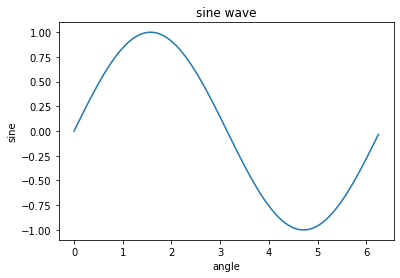

In [12]:
plt.plot(x,y)
plt.xlabel("angle")
plt.ylabel("sine")
plt.title('sine wave')
plt.show()

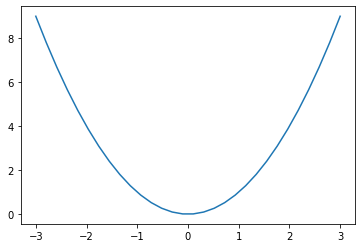

In [13]:
x = np.linspace(-3, 3, 30)
y = x**2
plt.plot(x, y)
plt.show()

Symbols : - , –, -., , . , , , o , ^ , v , < , > , s , + , x , D , d , 1 , 2 , 3 , 4 , h , H , p , | , _

colors : b, g, r, c, m, y, k, w


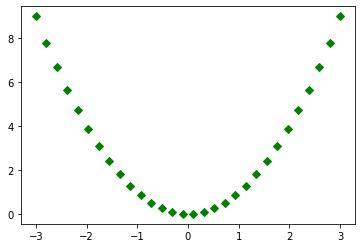

In [17]:
x = np.linspace(-3, 3, 30)
y = x**2
plt.plot(x, y,'Dg')
plt.show()

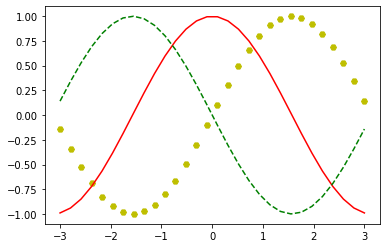

In [20]:
plt.plot(x, np.sin(x),'yH')
plt.plot(x, np.cos(x), 'r-')
plt.plot(x, -np.sin(x), 'g--')
plt.show()

While it is easy to quickly generate plots with the matplotlib.pyplot module, the use of object-oriented approach is recommended as it gives more control and customization of your plots.

In object-oriented interface, Pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses Pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

Text(0.5, 1.0, 'sine wave')

Text(0.5, 0, 'angle')

Text(0, 0.5, 'sine')

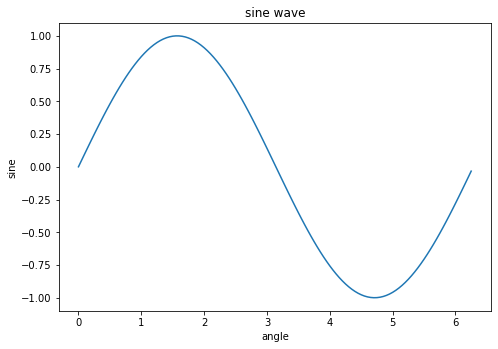

In [21]:
from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
# figure module contains the Figure class. It is a top-level container for all plot elements. 
fig = plt.figure()
# The add_axes() method requires a list object of 4 elements corresponding to 
# left, bottom, width and height of the figure. Each number must be between 0 and 1
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_title("sine wave")
ax.set_xlabel('angle')
ax.set_ylabel('sine')
plt.show()

#### Axes
Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects. The Axes class and its member functions are the primary entry point to working with the OO interface.

Axes object is added to figure by calling the add_axes() method. It returns the axes object and adds an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height.

<b>axes.plot()</b>

This is the basic method of axes class that plots values of one array versus another as lines or markers. The plot() method can have an optional format string argument to specify color, style and size of line and marker.

<pre>
<b>Color codes</b>
‘b’ 	Blue
‘g’ 	Green
‘r’ 	Red
‘b’ 	Blue
‘c’ 	Cyan
‘m’ 	Magenta
‘y’ 	Yellow
‘k’ 	Black
‘b’ 	Blue
‘w’ 	White

<b>Marker codes</b>
‘.’ 	Point marker
‘o’ 	Circle marker
‘x’ 	X marker
‘D’ 	Diamond marker
‘H’ 	Hexagon marker
‘s’ 	Square marker
‘+’ 	Plus marker

<b>Line styles</b>
‘-‘ 	Solid line
‘—‘ 	Dashed line
‘-.’ 	Dash-dot line
‘:’ 	Dotted line
‘H’ 	Hexagon marker

</pre>


<b>Legend</b>

The legend() method of axes class adds a legend to the plot figure. It takes three parameters −






Text(0.5, 1.0, 'Advertisement effect on sales')

Text(0.5, 0, 'medium')

Text(0, 0.5, 'sales')

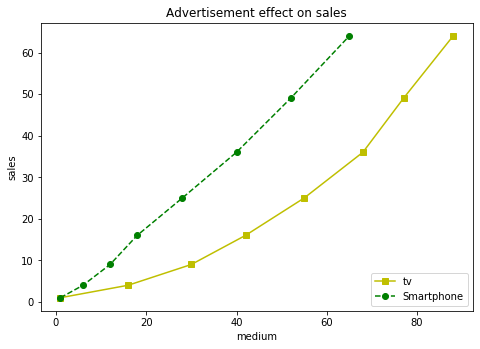

In [22]:
import matplotlib.pyplot as plt
y = [1, 4, 9, 16, 25,36,49, 64]
x1 = [1, 16, 30, 42,55, 68, 77,88]
x2 = [1,6,12,18,28, 40, 52, 65]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(x1,y,'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(x2,y,'go--') # dash line with green colour and circle marker
ax.legend(labels = ('tv', 'Smartphone'), loc = 'lower right') # legend placed at lower right
ax.set_title("Advertisement effect on sales")
ax.set_xlabel('medium')
ax.set_ylabel('sales')
plt.show()

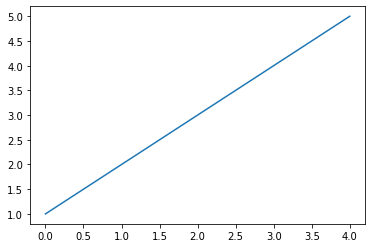

In [25]:
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3,4,5])

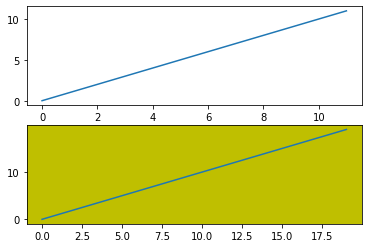

In [28]:
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid with 2 rows and 1 column.
#Since this subplot will overlap the first, the plot (and its axes) previously 
# created, will be removed
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background
plt.plot(range(20))

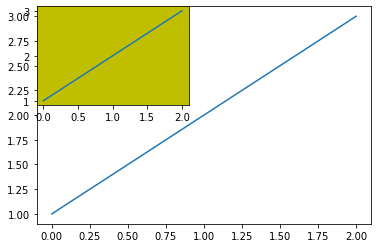

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot([1,2,3])
ax2 = fig.add_subplot(221, facecolor='y')
ax2.plot([1,2,3])

Text(0.5, 1.0, 'sine')

Text(0.5, 1.0, 'cosine')

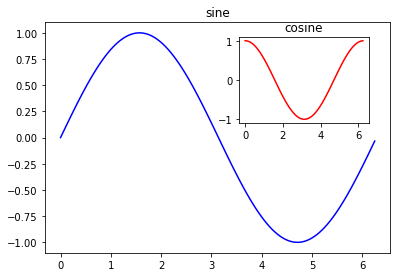

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
fig=plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.55, 0.55, 0.3, 0.3]) # inset axes
y = np.sin(x)
axes1.plot(x, y, 'b')
axes2.plot(x,np.cos(x),'r')
axes1.set_title('sine')
axes2.set_title("cosine")
plt.show()

Text(0.5, 1.0, 'square')

Text(0.5, 1.0, 'square root')

Text(0.5, 1.0, 'exp')

Text(0.5, 1.0, 'log')

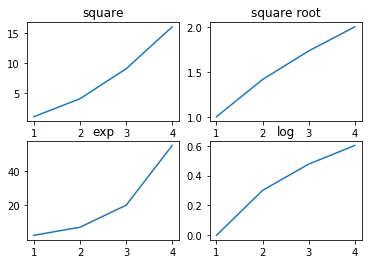

In [46]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2)
import numpy as np
x = np.arange(1,5)
a[0][0].plot(x,x*x)
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')
plt.show()

Text(0.5, 1.0, 'square')

Text(0.5, 1.0, 'exp')

Text(0.5, 1.0, 'log')

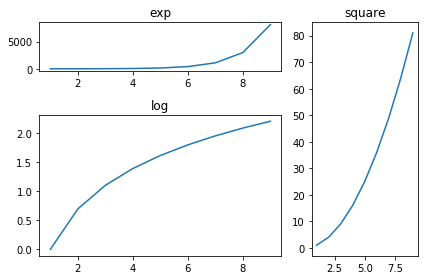

In [47]:
import matplotlib.pyplot as plt
a1 = plt.subplot2grid((3,3),(0,0),colspan = 2)
a2 = plt.subplot2grid((3,3),(0,2), rowspan = 3)
a3 = plt.subplot2grid((3,3),(1,0),rowspan = 2, colspan = 2)
import numpy as np
x = np.arange(1,10)
a2.plot(x, x*x)
a2.set_title('square')
a1.plot(x, np.exp(x))
a1.set_title('exp')
a3.plot(x, np.log(x))
a3.set_title('log')
plt.tight_layout()
plt.show()

#### Twin Axis

Text(0, 0.5, 'exp')

Text(0, 0.5, 'log')

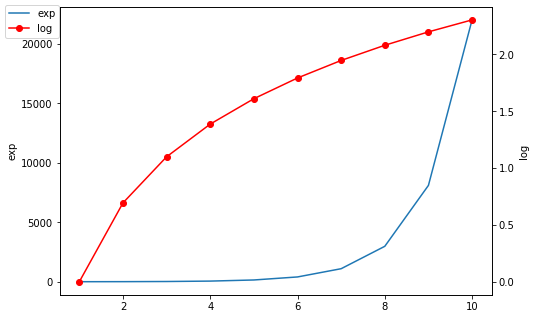

In [48]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = np.arange(1,11)
a1.plot(x,np.exp(x))
a1.set_ylabel('exp')
a2 = a1.twinx()
a2.plot(x, np.log(x),'ro-')
a2.set_ylabel('log')
fig.legend(labels = ('exp','log'),loc='upper left')
plt.show()

#### Bar Chart
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

<BarContainer object of 5 artists>

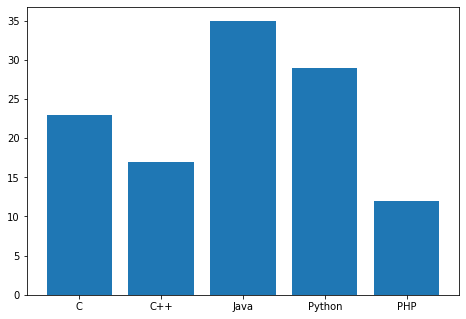

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

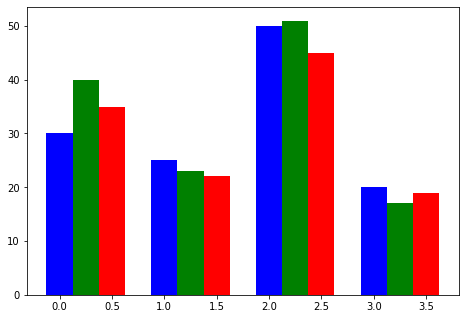

In [50]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

The stacked bar chart stacks bars that represent different groups on top of each other. The height of the resulting bar shows the combined result of the groups.

The optional bottom parameter of the pyplot.bar() function allows you to specify a starting value for a bar. Instead of running from zero to a value, it will go from the bottom to the value. The first call to pyplot.bar() plots the blue bars. The second call to pyplot.bar() plots the red bars, with the bottom of the blue bars being at the top of the red bars.

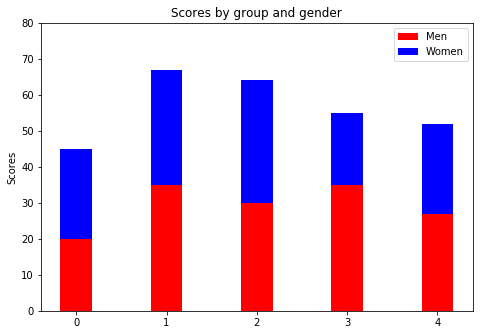

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

#### Histogram
A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. It is a kind of bar graph.

To construct a histogram, follow these steps −

- Bin the range of values.
- Divide the entire range of values into a series of intervals.
- Count how many values fall into each interval.

The bins are usually specified as consecutive, non-overlapping intervals of a variable.

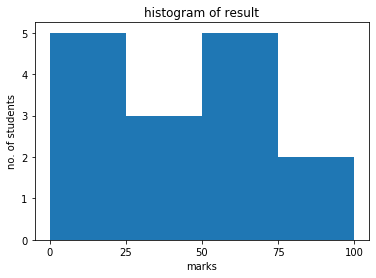

In [3]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots(1,1)
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
ax.hist(a, bins = [0,25,50,75,100])
ax.set_title("histogram of result")
ax.set_xticks([0,25,50,75,100])
ax.set_xlabel('marks')
ax.set_ylabel('no. of students')
plt.show()

#### Box Plot
A box plot which is also known as a whisker plot displays a summary of a set of data containing the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

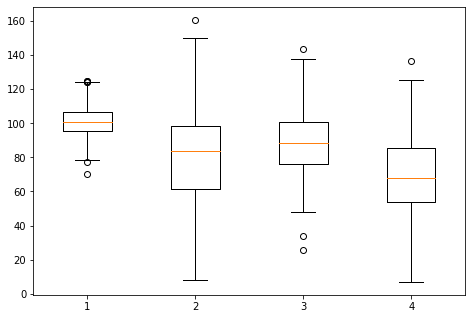

In [5]:
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)
data_to_plot = [collectn_1,collectn_2,collectn_3,collectn_4]
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.show()

#### Pie Chart
A Pie Chart can only display one series of data. Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie.

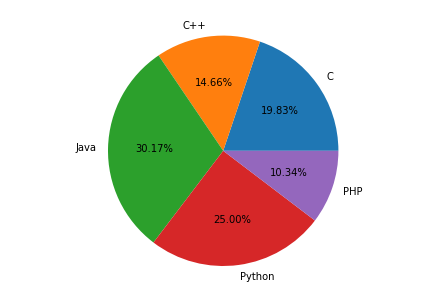

In [6]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

#### Violin Plot
Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots. Overlaid on this box plot is a kernel density estimation. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories".

A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

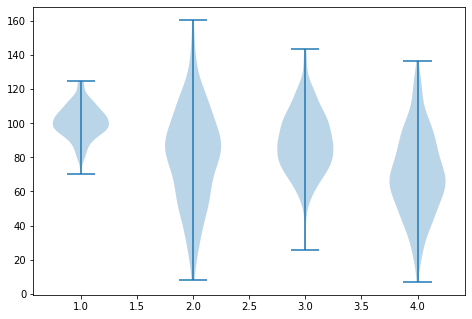

In [7]:
import matplotlib.pyplot as plt

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

#### Scatter Plot
Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker the position depends on its values in the columns set on the X and Y axes. A third variable can be set to correspond to the color or size of the markers, thus adding yet another dimension to the plot.

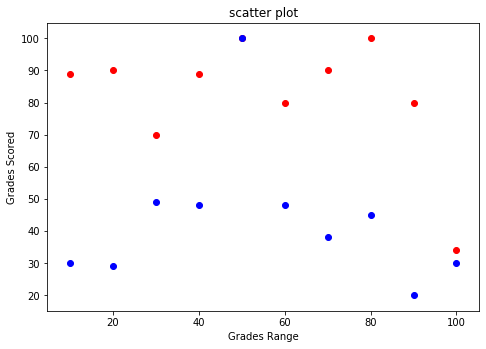

In [8]:
import matplotlib.pyplot as plt
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

#### lmplot (seaborn)
The lineplot (lmplot) is one of the most basic plots. It shows a line on a 2 dimensional plane. You can plot it with seaborn or matlotlib depending on your preference.

<b>lmplot</b>

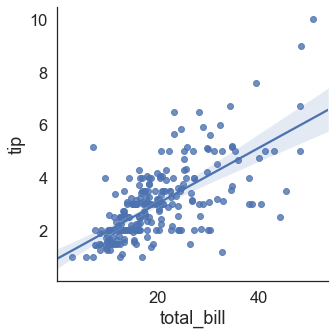

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

data=sns.load_dataset("tips")
data.head(5)

sns.set(font_scale=1.5,style="white")
sns.lmplot(x="total_bill",y="tip",data=data)
plt.show()

<b>line plot</b>

The plot below shows different types of line plots. They can be any color you’d like. We use a dataset included in seaborn, but this would work with any kind of data.

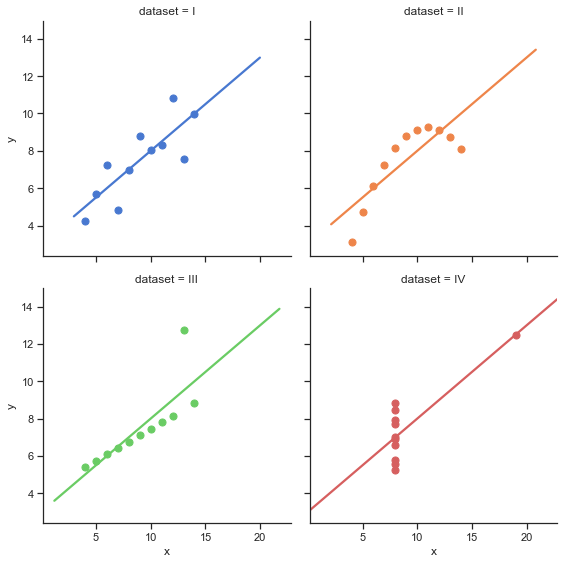

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

plt.show()

#### relplot

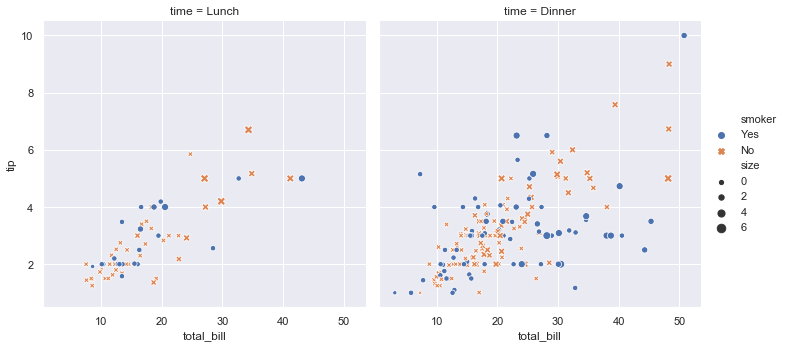

In [11]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

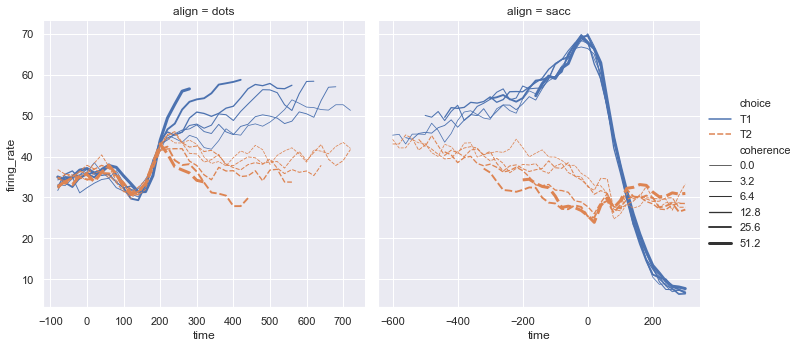

In [12]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

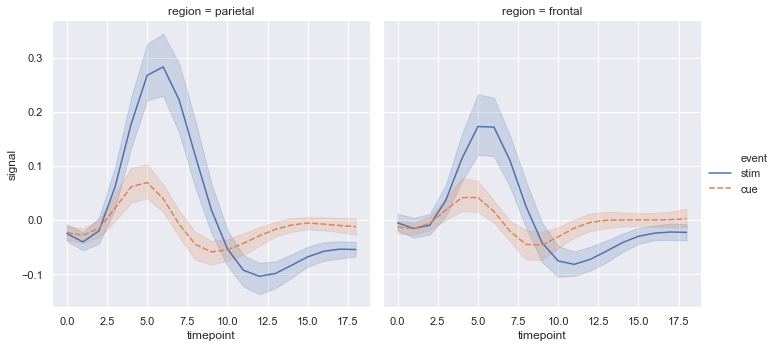

In [13]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

#### catplot

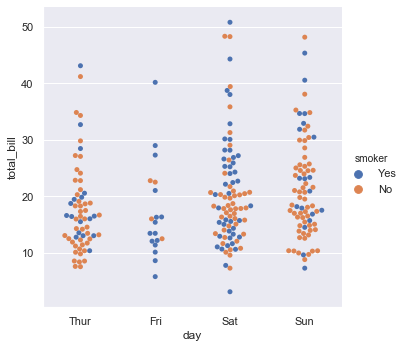

In [14]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

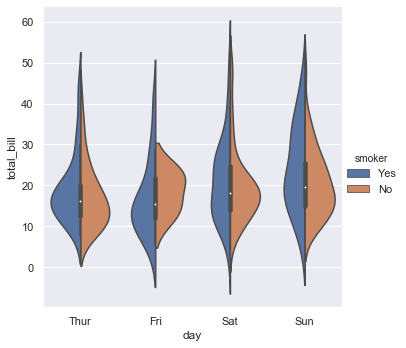

In [15]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

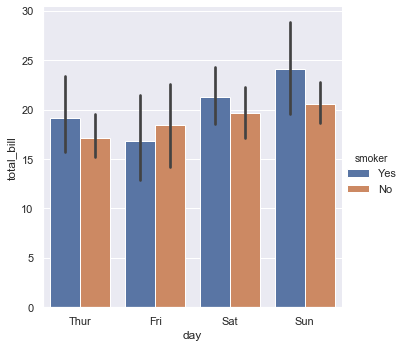

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips);

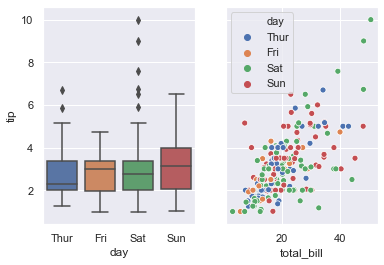

In [17]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

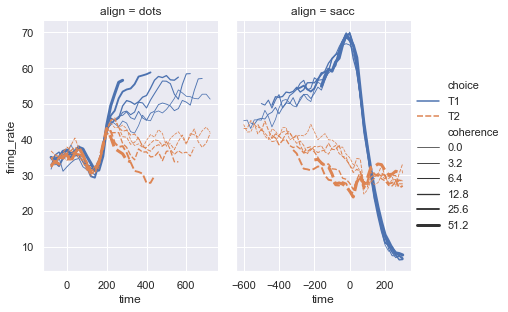

In [18]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

#### jointplot

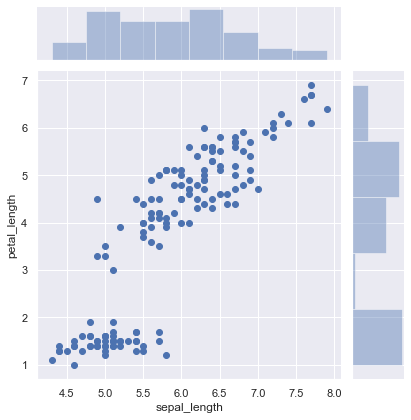

In [19]:
iris = sns.load_dataset("iris")
sns.jointplot(x="sepal_length", y="petal_length", data=iris);

#### pairplot

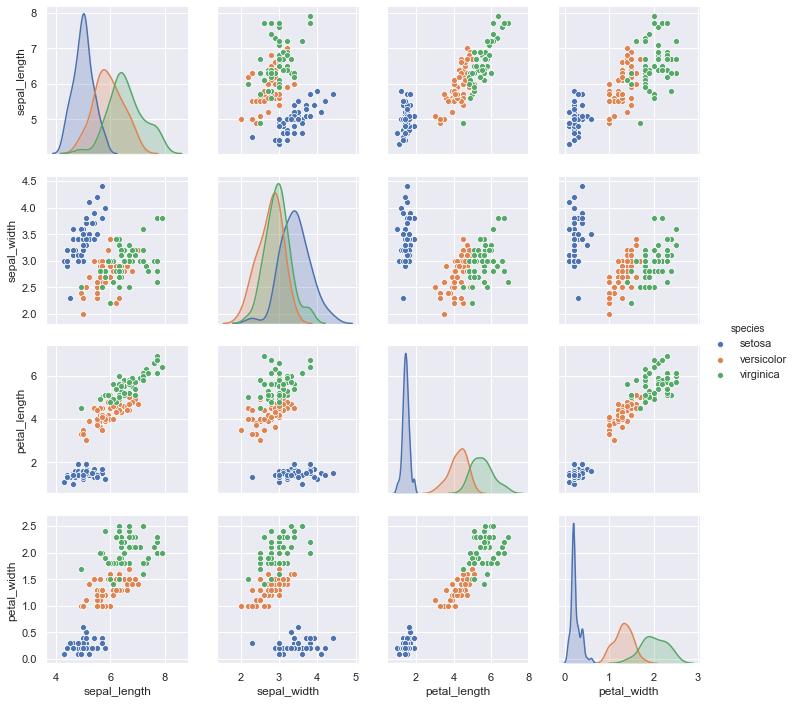

In [20]:
sns.pairplot(data=iris, hue="species");

#### Other plots discussed in class
- heatmap
- Rug plot
- Reg plots
- Corr plots
- kde plots
- hex plots
- surface plots (for non linear)
- plane for linear
- hyper plane for non linear
- 1 continous v/s 1 class
    - Bargraph
    - Box plot
    - Violin plot
    - Swarm plot
    - Strip plot
- 1 class/discrete
    - count plot
- 2 class variables
    - frequency tables
    - heatmap

# TODO 

- Read python wheel packages
- Practice EDA with matplotlib,seaborn & plotly (https://seaborn.pydata.org/tutorial/relational.html)